In [1]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=500, n_features=4,
                    n_classes=3, n_clusters_per_class=1,
                    random_state=42)
stimuli = {'x': x, 'y': y}

In [2]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(stimuli['x'])

PCA(n_components=2)

In [3]:
import pandas as pd

chart_data = pd.DataFrame(pca.transform(stimuli['x']), columns=['1', '2'])
chart_data['y'] = stimuli['y']

In [8]:
import plotly.graph_objs as go

chart_data = pd.DataFrame(pca.transform(stimuli['x']), columns=['1', '2'])
chart_data['y'] = stimuli['y']
trace = []
for y in chart_data['y'].unique():
    dfi = chart_data[chart_data['y'] == y]
    trace.append(go.Scatter(x=dfi['1'], y=dfi['2'], mode='markers', name=str(y)))
fig = go.Figure(data=trace)
fig.show()

In [15]:
%reload_ext autoreload
%autoreload 2


from src.nuclei.nucleus import LongNucleus1B, LongNucleus
from src.nuclei.activations import Sigmoid, Binary, Relu
from src.nuclei.losses import CrossEntropy, MAE
from src.nuclei.anneal import LongAnneal

In [16]:
n = LongNucleus(input_size=4, output_size=2, activation=Sigmoid(), lr=0.05)
anneal = LongAnneal(n, temp=2, loss_func=CrossEntropy(), steps=500, epochs=5)

Epoch: 1


training in epoch 1: 100%|██████████| 500/500 [00:04<00:00, 118.94it/s]


Epoch 1 validation error: 0.6912166892745165
Epoch training loss: 0.693057780431179
Epoch: 2


training in epoch 2: 100%|██████████| 500/500 [00:04<00:00, 112.04it/s]


Epoch 2 validation error: 0.44670277979542233
Epoch training loss: 0.5860703925451436
Epoch: 3


training in epoch 3: 100%|██████████| 500/500 [00:04<00:00, 111.83it/s]


Epoch 3 validation error: 0.33235406890082936
Epoch training loss: 0.380347747094832
Epoch: 4


training in epoch 4: 100%|██████████| 500/500 [00:04<00:00, 117.82it/s]
/Users/uandrl9/Git/nuclei/src/nuclei/losses.py:61: RuntimeWarning:

divide by zero encountered in log

/Users/uandrl9/Git/nuclei/src/nuclei/losses.py:61: RuntimeWarning:

invalid value encountered in multiply



Epoch 4 validation error: 0.28253060832432547
Epoch training loss: 0.20937236120986683
Epoch: 5


training in epoch 5: 100%|██████████| 500/500 [00:04<00:00, 116.95it/s]


Epoch 5 validation error: 0.2528417423331317
Epoch training loss: 0.10759874076668893


<Axes: >

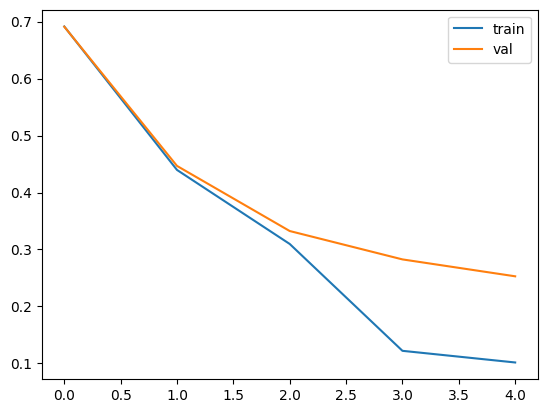

In [17]:
import pandas as pd

best, loss, val = anneal.stimulate(stimuli, validate=True, train_size=0.2)
pd.DataFrame(val).plot()

In [18]:
def predict_case(model, stimulus):
    pred = [str(int(round(v, 0))) for v in model.project(stimulus)]
    pred = ''.join(pred)
    return int(pred, 2)

preds = []
for i in range(len(stimuli['x'])):
    preds.append(predict_case(best, stimuli['x'][i]))

In [21]:
chart_data = pd.DataFrame(pca.transform(stimuli['x']), columns=['1', '2'])
chart_data['y'] = preds == stimuli['y']
trace = []
for y in chart_data['y'].unique():
    dfi = chart_data[chart_data['y'] == y]
    trace.append(go.Scatter(x=dfi['1'], y=dfi['2'], mode='markers', name=str(y)))
fig = go.Figure(data=trace)
fig.show()

In [20]:
(stimuli['y'] == preds).mean()

0.888